# Working with Images and Text

In [1]:
%matplotlib inline

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from PIL import Image
#openCV

from skimage.io import imread
from skimage.transform import resize, rotate
from skimage.morphology import closing
from scipy.ndimage import convolve

from collections import Counter

import re
import nltk

from sklearn.datasets import fetch_20newsgroups

In [4]:
cat_image = imread("data/cat.jpg")

In [5]:
cat_image.shape # винаги вертикалният размер е първи(броят на редовете) (width, height, number_of_chanels(red, green, blue,...))

(5546, 3961, 3)

In [6]:
cat_image[0, 0, :] # нулев пиксел 

array([ 88, 112, 122], dtype=uint8)

In [7]:
cat_image[20:40, 50:100, :] # отрязък

array([[[ 80, 107, 118],
        [ 84, 111, 122],
        [ 97, 124, 135],
        ...,
        [ 95, 123, 135],
        [ 74, 104, 115],
        [ 86, 116, 127]],

       [[ 63,  90, 101],
        [ 66,  93, 104],
        [ 80, 107, 118],
        ...,
        [ 94, 122, 134],
        [ 86, 114, 126],
        [ 98, 126, 138]],

       [[ 75, 102, 113],
        [ 76, 103, 114],
        [ 94, 121, 132],
        ...,
        [ 92, 120, 132],
        [103, 131, 143],
        [ 94, 122, 134]],

       ...,

       [[113, 137, 149],
        [108, 132, 144],
        [103, 127, 139],
        ...,
        [113, 143, 154],
        [ 54,  84,  95],
        [105, 135, 146]],

       [[100, 124, 136],
        [102, 126, 138],
        [107, 131, 143],
        ...,
        [114, 142, 153],
        [ 84, 112, 123],
        [ 73, 101, 112]],

       [[ 90, 114, 126],
        [ 94, 118, 130],
        [109, 133, 145],
        ...,
        [ 95, 122, 133],
        [135, 162, 173],
        [ 71,  98, 109]]

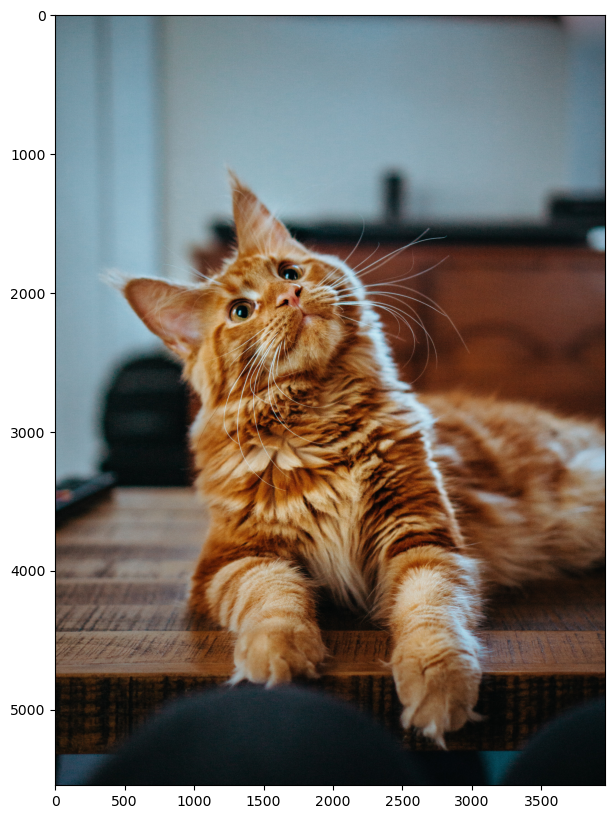

In [10]:
plt.figure(figsize = (8, 10))
plt.imshow(cat_image)
plt.show()

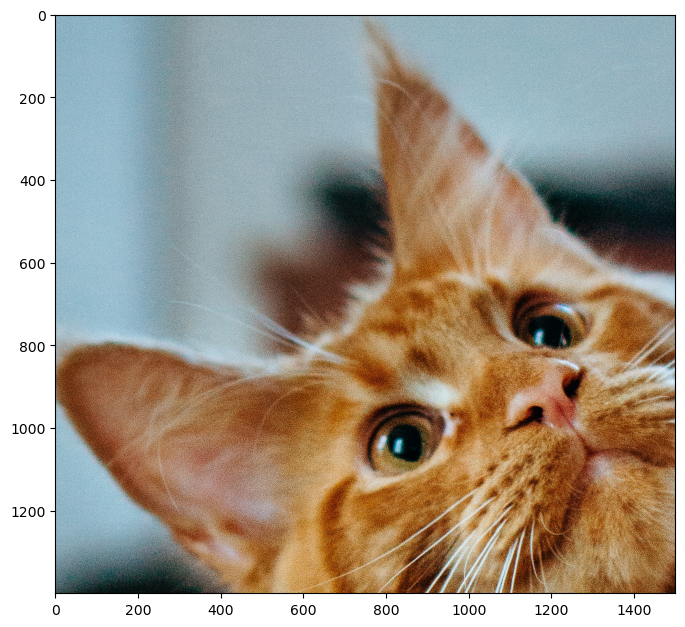

In [13]:
plt.figure(figsize = (8, 10))
plt.imshow(cat_image[1100:2500, 500:2000, :])
plt.show()

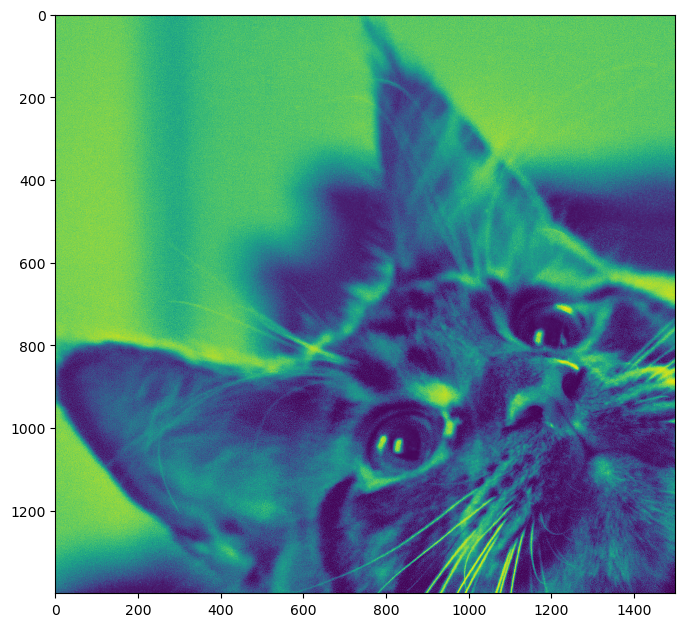

In [14]:
plt.figure(figsize = (8, 10))
plt.imshow(cat_image[1100:2500, 500:2000, 2]) #blue
plt.show() 

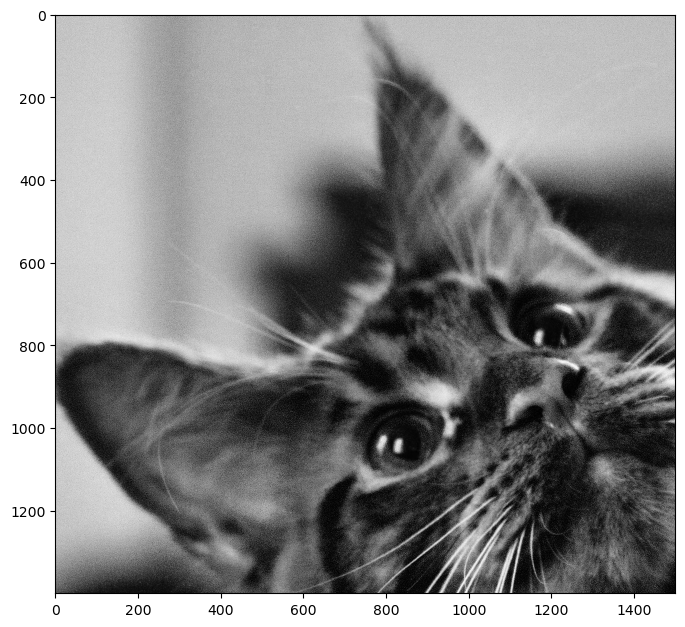

In [15]:
plt.figure(figsize = (8, 10))
plt.imshow(cat_image[1100:2500, 500:2000, 2], cmap = "gray") #blue
plt.show() 

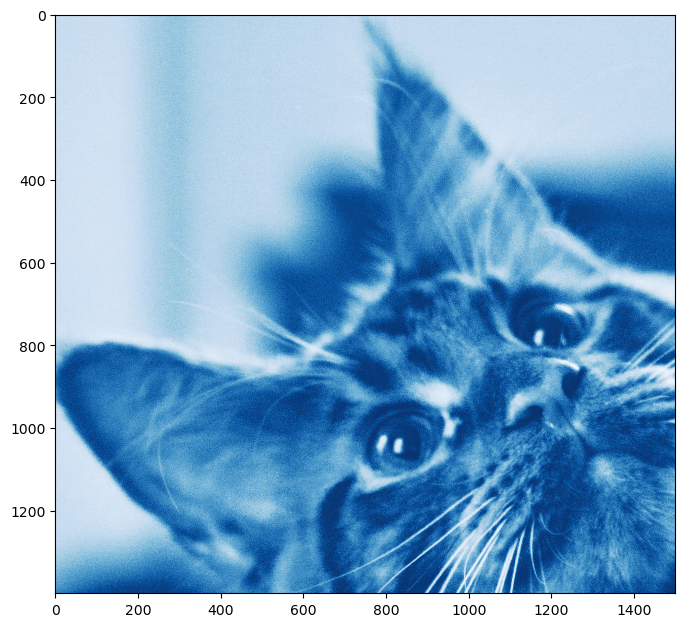

In [16]:
plt.figure(figsize = (8, 10))
plt.imshow(cat_image[1100:2500, 500:2000, 2], cmap = "Blues_r") #blue колкото по-малка е стойността(по-тъмно) толкова по-синюо е
plt.show() 

In [17]:
cat_image.dtype # цяло число, 8 битово, без знак

dtype('uint8')

In [18]:
cat_image.min(), cat_image.max()

(0, 255)

In [20]:
for chanel in [0, 1, 2]:
    print(f"Chanel {chanel}, min: {cat_image[:, :, chanel].min()}, max: {cat_image[:, :, chanel].max()} , mean: {cat_image[:, :, chanel].mean()}")

Chanel 0, min: 0, max: 255 , mean: 106.25991334734724
Chanel 1, min: 0, max: 255 , mean: 97.07561199152975
Chanel 2, min: 0, max: 255 , mean: 87.9236385446892


In [21]:
for index, chanel in enumerate(["r", "g", "b"]):
    print(f"Chanel {chanel}, min: {cat_image[:, :, index].min()}, max: {cat_image[:, :, index].max()} , mean: {cat_image[:, :, index].mean()}")
    
# в изображението няма синьо, но тук стойностите на синьо са голями - бялото, черното и сивото са комбинация от всични цветове

Chanel r, min: 0, max: 255 , mean: 106.25991334734724
Chanel g, min: 0, max: 255 , mean: 97.07561199152975
Chanel b, min: 0, max: 255 , mean: 87.9236385446892


## Image histogram

In [22]:
red = cat_image[:, :, 0]
green = cat_image[:, :, 1]
blue = cat_image[:, :, 2]

In [23]:
red

array([[ 88,  77, 100, ..., 145, 128, 114],
       [ 86,  73,  72, ..., 142, 154, 104],
       [100,  98,  64, ..., 133, 131, 128],
       ...,
       [  0,   5,   9, ...,   5,   3,   2],
       [  7,   4,  20, ...,   8,   9,   4],
       [ 18,  12,  23, ...,   8,   9,   4]], dtype=uint8)

In [25]:
red.ravel() # ако вземем на всички редове и ги залепим един до друг

array([ 88,  77, 100, ...,   8,   9,   4], dtype=uint8)

In [29]:
cat_image.shape

(5546, 3961, 3)

In [27]:
red.ravel().shape # 5546 * 3961

(21967706,)

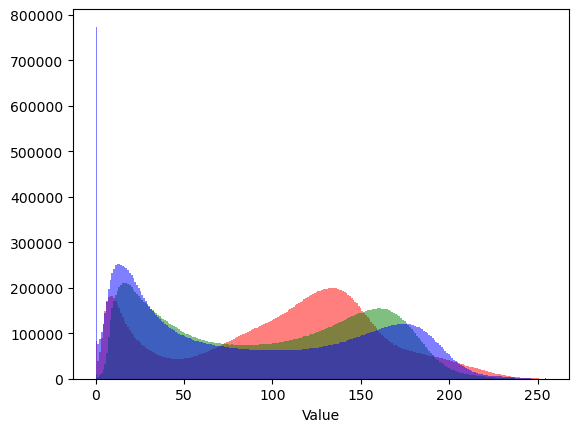

In [36]:
plt.hist(red.ravel(), bins = 256, color = "r", alpha = 0.5)
plt.hist(green.ravel(), bins = 256, color = "g", alpha = 0.5)
plt.hist(blue.ravel(), bins = 256, color = "b", alpha = 0.5)

plt.xlabel("Value") # колкото по-голяма е стойността толкова по-светло е било
plt.show()

In [37]:
blue.max() / blue.std(ddof = 1) #RSNR Peek Signal to Noice Ratio; 
#голяма разлика - по-контрастно и цветно изображение; 
#малка разлика - най-голямия пиксел се гуви в типичното разстояние межсу пиксели

3.8097436266579874

In [39]:
random_image = np.random.randint(0, 255, size = (5546, 3961,3))

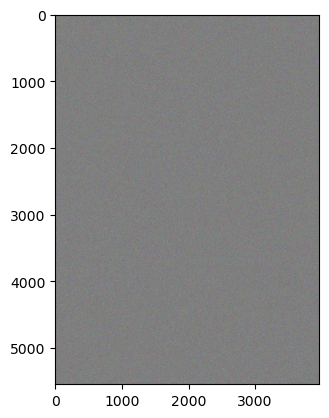

In [40]:
plt.imshow(random_image)
plt.show()

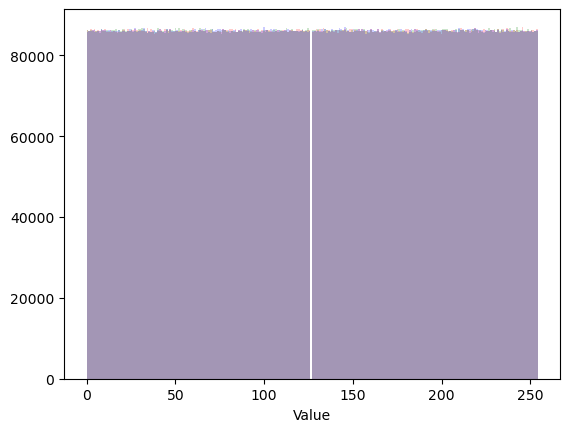

In [42]:
plt.hist(random_image[:, :, 0].ravel(), bins = 256, color = "r", alpha = 0.2)
plt.hist(random_image[:, :, 1].ravel(), bins = 256, color = "g", alpha = 0.2)
plt.hist(random_image[:, :, 2].ravel(), bins = 256, color = "b", alpha = 0.2)

plt.xlabel("Value")
plt.show()

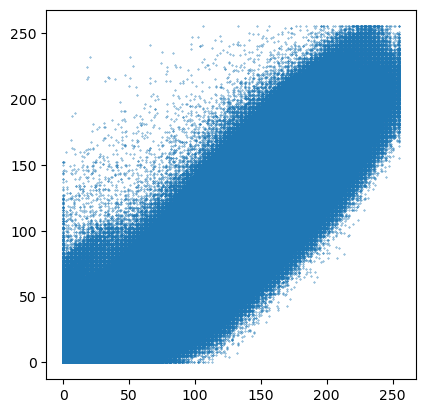

In [46]:
plt.scatter(red.ravel(), green.ravel(), s = 0.1)
plt.gca().set_aspect("equal")
plt.show()

## Converting to grayscale

In [ ]:
# gamma correction grayscale - начин да направим изображението адекватно спрямо нашето зрение 

In [48]:
cat_grayscale = 0.299 * red + 0.587 * green + 0.114 * blue # даваме по-голяма тежест на зеленото заради възприятието на чов. око

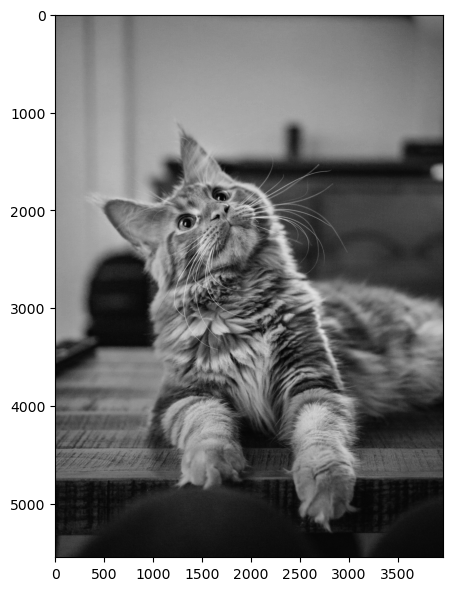

In [51]:
plt.figure(figsize = (5, 8))
plt.imshow(cat_grayscale, cmap = "gray")
plt.show()

## Convolution

In [109]:
kernel = np.ones((3, 3)) / 100.0 # с колкото по-голямо число делим толкова по-голямо замъгляване получаваме

In [110]:
kernel

array([[0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01]])

In [111]:
(cat_grayscale[0: 3, 0:3] * kernel).sum() # умножаваме по елементно с kernel и събираме - така получаваме едно число ...правим това за всеки пиксел

9.19676

In [112]:
result = convolve(cat_grayscale, kernel)

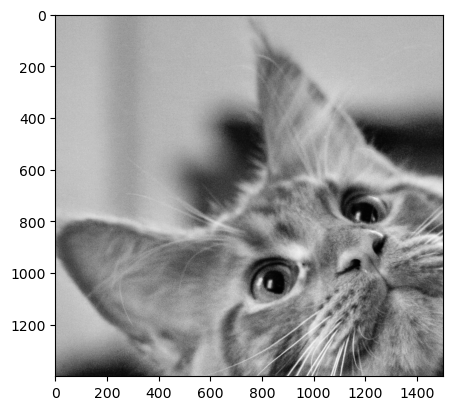

In [113]:
#Усредняваме около всеки пиксел и затова изображението е по-замаглено
plt.figure(figsize=(5, 8))
plt.imshow(result[1100:2500, 500:2000], cmap = "gray")
plt.show()

## Image Morphology

Morphology - search for forms

We should work with black and white images (not grayscale).

Four main operations:

* **Dialation** - Replace all values with the max value - Makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger. Бллото пробива в четното.
* **Erosion** - Replace all values with the min value - Removes floating pixels and thin lines so that only substantive objects remain. Remaining lines appear thinner and shapes appear smaller. Черното изяжда бялото.
* **Opening** - Erosion followed by dilation. Отваря дупки, премахва малките неща.
* **Closing** - Dilation followed by erosion. Затваря дупки.

In [130]:
#Трпябва ни черно-бяло изображение
cat_bw = cat_grayscale.copy()
cat_bw[cat_bw > 150] = 255
cat_bw[cat_bw < 150] = 0

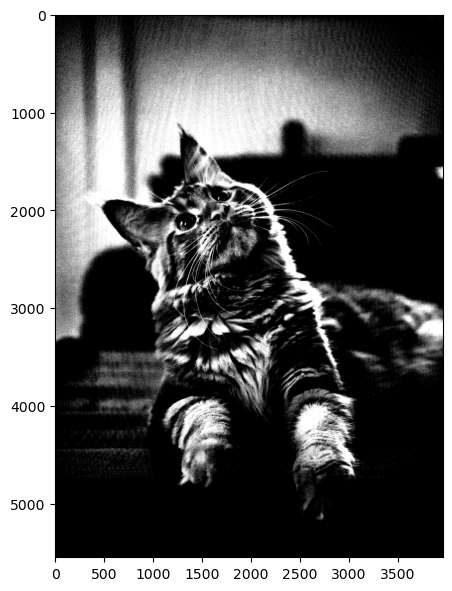

In [131]:
plt.figure(figsize = (5, 8))
plt.imshow(cat_bw, cmap = "gray")
plt.show()

In [143]:
result = closing(cat_bw, np.ones((6, 6))) # матрицата е структурен елемент, който се прилага на изображението

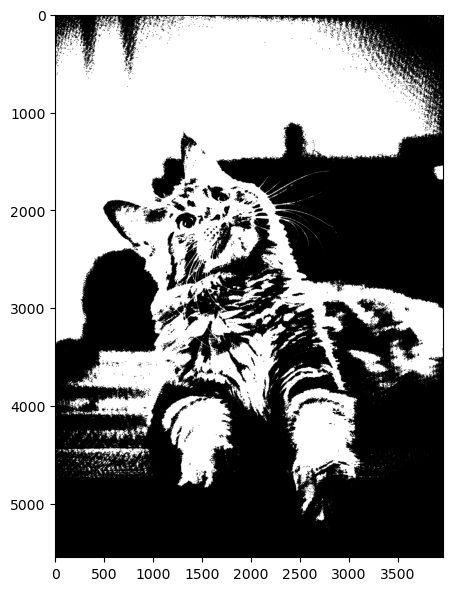

In [144]:
plt.figure(figsize = (5, 8))
plt.imshow(result, cmap = "gray")
plt.show()

## Other operations on Images

* Matrix operations – pixel-wise
    * One image: Addition, gain, negative; resampling, cutting
    * Transformations – perspective, warp, etc.
    * Two (or more) images: Addition (multiple exposure),subtraction (difference), division (normalization), averaging
* Thresholding (usually 2 levels)
* Fourier transform, filtering and convolution
* Contrast enhancement, histogram equalization
* Stacking (many 2D images ⇒ one 3D image)
* Analysis
    * Measurements, segmentation, object extraction / identification
    * Enhancements, inpainting

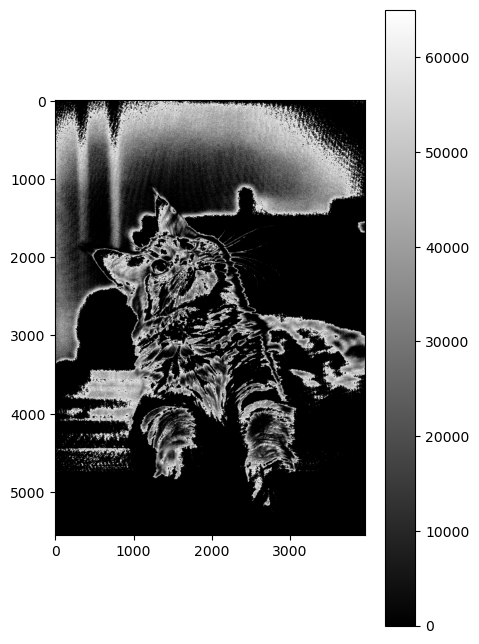

In [149]:
plt.figure(figsize = (5, 8))
plt.imshow(np.abs(cat_bw - result) ** 2, cmap = "gray")
plt.colorbar()
plt.show()

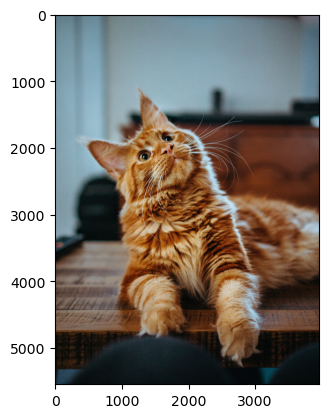

In [151]:
plt.imshow(cat_image)
plt.show()

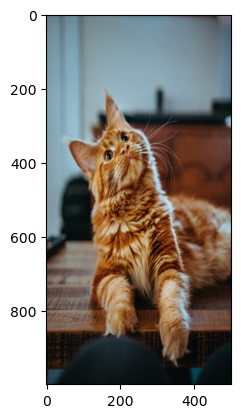

In [158]:
plt.imshow(resize(cat_image, (1000,500)))

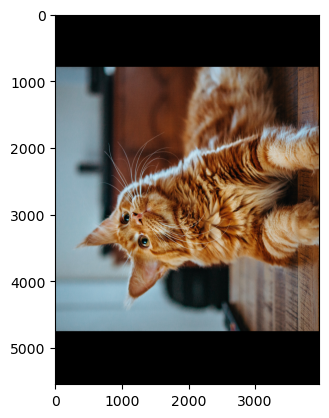

In [163]:
plt.imshow(rotate(cat_image, 90))
plt.show()

## Text Processing

In [8]:
with open("data/alice.txt", mode = "r", encoding="utf8") as file:
    text = file.read()

In [9]:
text

"\n\n\nProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nRelease Date: June 25, 2008 [EBook #11]\nLast Updated: October 6, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\nProduced by Arthur DiBianca and David Widger\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nALICE’S ADVENTURES\nIN WONDERLAND\n\n\nBy Lewis Carroll\n\n\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\n\nContents\nCHAPTER I. \tDown the Rabbit-Hole\nCHAPTER II. \tThe Pool of Tears\nCHAPTER III. \tA Caucus-Race and a Long Tale\nCHAPTER IV. \tThe Rabbit Sends in a Little Bill\nCHAPTER V. \tAdvic

In [10]:
text[42000:42200]

'hat’s Bill,’ thought Alice,) ‘Well, I hardly know—No more, thank ye; I’m better now—but I’m a deal too flustered to tell you—all I know is, something comes at me like a Jack-in-the-box, and up I goes '

In [11]:
counter = Counter(text)

In [12]:
counter["h"] # колко често се среща символа h

7669

In [13]:
counter.most_common(20)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481),
 ('d', 5275),
 ('l', 5111),
 ('u', 3926),
 ('c', 2843),
 ('g', 2766),
 ('w', 2725),
 (',', 2566),
 ('y', 2489),
 ('m', 2272),
 ('\n', 2266)]

In [14]:
symbols = [symbol for symbol, count in counter.most_common(20)]
counts = [count for symbol, count in counter.most_common(20)]

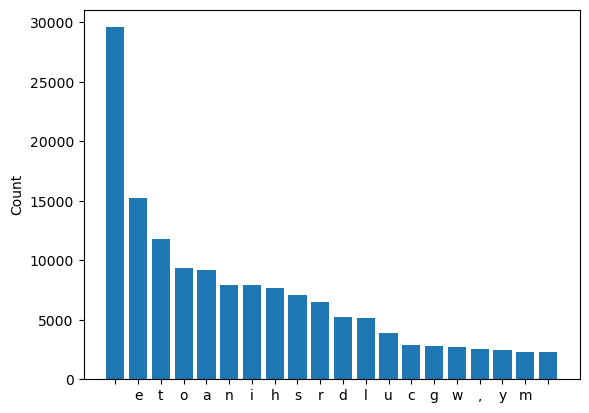

In [15]:
plt.bar(symbols, counts)
plt.ylabel("Count")
plt.show()
# Разпределение на Парето

## Preparing Text Data
* Before we start working with the text, we have to "normalize" and clean up the messy data
    * Tokenization - parsing a large amount of textual data into parts to perform an analysis of the character of the text
    * Remove all non-letter characters
        * Numbers, punctuation, whitespace, etc.
        * If needed, apply additional rules, e.g., if we're looking at tweets, @mention means a username and we may want to get rid of it
    * Transform all characters to lowercase
    * Remove "stopwords"
        * Words that are too frequent in all documents and don't contain much information such as "the", "a", "is", etc.
    * Perform stemming or lemmatization
        * Stemming
            * Extract the stems of all words, e.g., "connected", "connection", "connecting"should all point to "connect"
            * process of reducing a word to its base or root form by removing the suffixes or prefixes
        * Lemmatization
            * process of reducing a word to its base or root form by using vocabulary and morphological analysis. Unlike stemming, lemmatization considers the context and part of speech of the word before reducing it to its base form. This means that lemmatization is a more accurate method of normalization than stemming.
    


In [35]:
# 1. Tokenization 
# we can use NLTK
words = re.split("\\W+", text) # simple solution

In [36]:
# 2. Normalization
words = [word.lower() for word in words]
words = [word for word in words if not word.isdigit()]

In [37]:
Counter(words).most_common(50)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462),
 ('in', 432),
 ('alice', 404),
 ('was', 358),
 ('that', 330),
 ('as', 274),
 ('her', 248),
 ('with', 228),
 ('at', 227),
 ('s', 222),
 ('t', 218),
 ('on', 204),
 ('all', 200),
 ('this', 181),
 ('for', 179),
 ('had', 178),
 ('but', 175),
 ('be', 167),
 ('not', 166),
 ('or', 155),
 ('they', 155),
 ('so', 152),
 ('very', 145),
 ('what', 142),
 ('is', 135),
 ('little', 129),
 ('he', 128),
 ('out', 118),
 ('if', 116),
 ('one', 106),
 ('down', 103),
 ('up', 103),
 ('about', 102),
 ('there', 101),
 ('no', 100),
 ('do', 98),
 ('his', 96),
 ('then', 94),
 ('gutenberg', 93),
 ('them', 88),
 ('know', 88)]

In [38]:
# 3. Remove words that have no meaning - stopwords
#nltk.download("stopwords")
stopwords = set(nltk.corpus.stopwords.words("english")) # в множество търсенето е константна операция

In [39]:
cleaned_words = [word for word in words if word not in stopwords]

In [40]:
Counter(cleaned_words).most_common(50)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58),
 ('mock', 57),
 ('tm', 57),
 ('hatter', 56),
 ('quite', 55),
 ('gryphon', 55),
 ('must', 54),
 ('rabbit', 53),
 ('think', 53),
 ('work', 53),
 ('much', 52),
 ('say', 51),
 ('first', 51),
 ('head', 50),
 ('go', 50),
 ('thing', 49),
 ('never', 48),
 ('voice', 48),
 ('come', 47),
 ('get', 46),
 ('oh', 45),
 ('looked', 45),
 ('got', 45),
 ('mouse', 44),
 ('duchess', 42),
 ('round', 41),
 ('came', 40),
 ('two', 40),
 ('tone', 40),
 ('dormouse', 40),
 ('great', 39)]

In [43]:
# 4. Stemming - process of reducing a word to its base or root form by removing the suffixes or prefixes
# Lemmatization - 
stemmer = nltk.stem.porter.PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in cleaned_words]

In [44]:
stemmed_words

['',
 'project',
 'gutenberg',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'copi',
 'give',
 'away',
 'use',
 'term',
 'project',
 'gutenberg',
 'licens',
 'includ',
 'ebook',
 'onlin',
 'www',
 'gutenberg',
 'org',
 'titl',
 'alic',
 'adventur',
 'wonderland',
 'author',
 'lewi',
 'carrol',
 'releas',
 'date',
 'june',
 'ebook',
 'last',
 'updat',
 'octob',
 'languag',
 'english',
 'charact',
 'set',
 'encod',
 'utf',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alic',
 'adventur',
 'wonderland',
 'produc',
 'arthur',
 'dibianca',
 'david',
 'widger',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'millennium',
 'fulcrum',
 'edit',
 'content',
 'chapter',
 'rabbit',
 'hole',
 'chapter',
 'ii',
 'pool',
 'tear',
 'chapter',
 'iii',
 'caucu',
 'race',
 'long',
 'tale',
 'chapter',
 'iv',
 'rabbit',
 'send',
 'littl',
 'bill',
 'chapter',
 'v',
 'advic',
 'caterpillar

In [45]:
Counter(stemmed_words).most_common(50)

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70),
 ('get', 68),
 ('think', 64),
 ('king', 64),
 ('well', 63),
 ('turtl', 62),
 ('way', 60),
 ('head', 60),
 ('come', 58),
 ('began', 58),
 ('mock', 57),
 ('hatter', 57),
 ('tm', 57),
 ('use', 55),
 ('much', 55),
 ('quit', 55),
 ('gryphon', 55),
 ('rabbit', 54),
 ('must', 54),
 ('first', 51),
 ('voic', 51),
 ('make', 50),
 ('cat', 50),
 ('never', 48),
 ('oh', 45),
 ('tri', 45),
 ('got', 45),
 ('mous', 44),
 ('turn', 42),
 ('duchess', 42),
 ('tone', 42)]

## TF – IDF


In [ ]:
fetch_20newsgroups()